# Titanic: Machine Learning from Disaster -> Predict if a passenger will survive or not

In [ ]:
# !pip install pandas numpy matplotlib seaborn sklearn

## Import Libraries

In [0]:
#importing the libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import io

## Load Training Data

In [0]:
# reading the training dataset
uploaded = files.upload()

Saving train.csv to train (1).csv


In [0]:
titanic_train = pd.read_csv(io.BytesIO(uploaded['train.csv']))
# titanic_train =  pd.read_csv('train.csv')
#titanic_test =  pd.read_csv('test.csv')

In [0]:
#shape command will give number of rows/samples/examples and number of columns/features/predictors in dataset
print(titanic_train.shape)
print(titanic_train.dtypes)
titanic_train.head()

(891, 12)
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic_train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### Data Dictionary

- Survival
    - 0 = No
    - 1 = Yes
- pclass - Ticket class
    - 1 = 1st
    - 2 = 2nd
    - 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp -	# of siblings / spouses aboard the Titanic	
- parch - # of parents / children aboard the Titanic	
- ticket - Ticket number	
- fare - Passenger fare	
- cabin - Cabin number	
- embarked - Port of Embarkation
    - C = Cherbourg
    - Q = Queenstown
    - S = Southampton


#### Variable Notes
- pclass: A proxy for socio-economic status (SES)
    - 1st = Upper
    - 2nd = Middle
    - 3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
- Sibling = brother, sister, stepbrother, stepsister
- Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
- Parent = mother, father
- child = daughter, son, stepdaughter, stepson
    Some children travelled only with a nanny, therefore parch=0 for them.

In [0]:
#info method provides information about dataset like 
#total values in each column, null/not null, datatype, memory occupied etc
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
#Describe gives statistical information about numerical columns in the dataset
titanic_train.describe()
#you can check from count if there are missing vales in columns, here age has got missing values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
#show first 5 rows of dataset
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
#check missing values
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Describe only gives stats about numerical columns
even Embarked and cabin has missing values

Age, Fare and cabin has missing values. we will see how to fill missing values next.

# Pandas Operations

In [0]:
#Create a sample dataframe
titanic_sample = titanic_train.copy()
titanic_sample.shape

(891, 12)

In [0]:
# select the 'Age' Series using bracket notation
titanic_sample['Age']

# or equivalently, use dot notation
titanic_sample.Age.head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [0]:
#selecting multiple features
titanic_sample[['Age', 'Name']].head()

,Age,Name
0,22.0,"Braund, Mr. Owen Harris"
1,38.0,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,26.0,"Heikkinen, Miss. Laina"
3,35.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,35.0,"Allen, Mr. William Henry"


In [0]:
type(titanic_sample), type(titanic_sample.Age), type(titanic_sample['Age']), type(titanic_sample[['Age']])

(pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series,
 pandas.core.frame.DataFrame)

In [0]:
#renaming a column in dataframe
print('before renaming',titanic_sample.columns)
titanic_sample.rename(columns={'Parch':'ParentChildren', 'SibSp':'SiblingSpouse'}, inplace=True)
titanic_sample.columns

before renaming Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SiblingSpouse', 'ParentChildren', 'Ticket', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

In [0]:
#remove column from a dataframe
titanic_sample.drop(['PassengerId', 'Survived'],axis = 1, inplace = True)
titanic_sample.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SiblingSpouse', 'ParentChildren',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
#drop a row (temporarily)
titanic_sample.drop(2, axis=0).head()

,Pclass,Name,Sex,Age,SiblingSpouse,ParentChildren,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [0]:
#Filter rows in dataframe
# Give passenger name & pclass with Age greater than 35 
titanic_sample.head()

,Pclass,Name,Sex,Age,SiblingSpouse,ParentChildren,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
titanic_sample[titanic_sample.Age > 35][['Name','Pclass']].head()

,Name,Pclass
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
6,"McCarthy, Mr. Timothy J",1
11,"Bonnell, Miss. Elizabeth",1
13,"Andersson, Mr. Anders Johan",3
15,"Hewlett, Mrs. (Mary D Kingcome)",2


In [0]:
titanic_sample.loc[titanic_sample.Age > 35,['Name','Pclass']].head()

,Name,Pclass
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1
6,"McCarthy, Mr. Timothy J",1
11,"Bonnell, Miss. Elizabeth",1
13,"Andersson, Mr. Anders Johan",3
15,"Hewlett, Mrs. (Mary D Kingcome)",2


In [0]:
titanic_sample.iloc[0:2, 0:4] # Exclusive of last row and column

,Pclass,Name,Sex,Age
0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0


In [0]:
#iterate throgh rows
i = 0
for index, row in titanic_sample.iterrows():
    print (index,row.Age,row.Pclass)
    i += 1
    if i == 10:
        break

0 22.0 3
1 38.0 1
2 26.0 3
3 35.0 1
4 35.0 3
5 nan 3
6 54.0 1
7 2.0 3
8 27.0 3
9 14.0 2


In [0]:
#calculate the mean age for each pclass category
titanic_sample.groupby('Pclass').Age.mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [0]:
titanic_sample.groupby('Pclass').Age.agg(['count', 'mean', 'min', 'max'])

,count,mean,min,max
Pclass,,,,
1,186,38.233441,0.92,80.0
2,173,29.877630,0.67,70.0
3,355,25.140620,0.42,74.0


In [0]:
# count how many times each value in the Series/Feature occurs
titanic_sample.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [0]:
# Sorting series by count
titanic_sample.Sex.value_counts().sort_values()

female    314
male      577
Name: Sex, dtype: int64

In [0]:
# display percentages instead of raw counts
titanic_sample.Sex.value_counts(normalize= True)

male      0.647587
female    0.352413
Name: Sex, dtype: float64

In [0]:
#find unique values
titanic_sample.Pclass.unique()

array([3, 1, 2])

In [0]:
#Simply mean of age
titanic_sample.Age.mean()

29.69911764705882

In [0]:
# Convert a fetaure into categorical from continuous
titanic_sample['Pclass'] = titanic_sample['Pclass'].astype('category')
titanic_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass            891 non-null category
Name              891 non-null object
Sex               891 non-null object
Age               714 non-null float64
SiblingSpouse     891 non-null int64
ParentChildren    891 non-null int64
Ticket            891 non-null object
Fare              891 non-null float64
Cabin             204 non-null object
Embarked          889 non-null object
dtypes: category(1), float64(2), int64(2), object(5)
memory usage: 63.7+ KB


# EDA (Exploratory Data Analysis)

In [0]:
# this line allows ipython notebook to display the plots in the output
%matplotlib inline

In [0]:
# gives the count of each unique value in a column
titanic_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

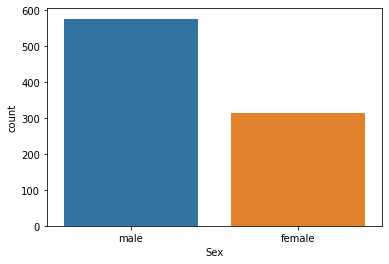

In [0]:
sns.countplot(x='Sex', data=titanic_train)

- Gives the graphical representation of value_counts that gives the count of each unique values in a feature
- Bar plot - Gives count of the different categories in the categorical feature

# Pclass vs Fare

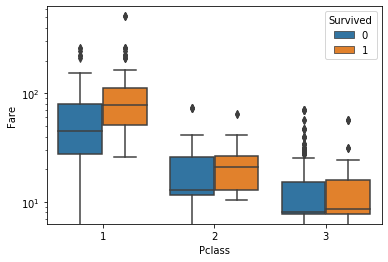

In [0]:
ax = sns.boxplot(x="Pclass", y="Fare", hue="Survived", data=titanic_train)
ax.set_yscale('log')

- Fares decrease as the Pclass increases

# Embarked vs Fare

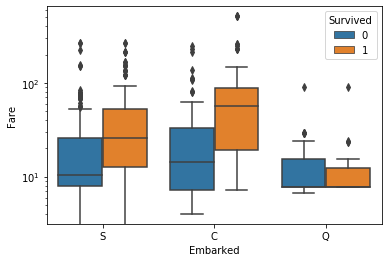

In [0]:
ax = sns.boxplot(x="Embarked", y="Fare", hue="Survived", data=titanic_train)
ax.set_yscale('log')

- Survival rates for passengers embarked at S and C who paid higher fare seems to be more

# Fare vs survival rates

In [0]:
#making fares into categories of ranges(<=7.91,[7.91,14.454],[14.454,31],[31,513])
titanic_train['Fare_cat']=0
titanic_train.loc[titanic_train['Fare']<=7.91,'Fare_cat']=0
titanic_train.loc[(titanic_train['Fare']>7.91)&(titanic_train['Fare']<=14.454),'Fare_cat']=1
titanic_train.loc[(titanic_train['Fare']>14.454)&(titanic_train['Fare']<=31),'Fare_cat']=2
titanic_train.loc[(titanic_train['Fare']>31)&(titanic_train['Fare']<=513),'Fare_cat']=3

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


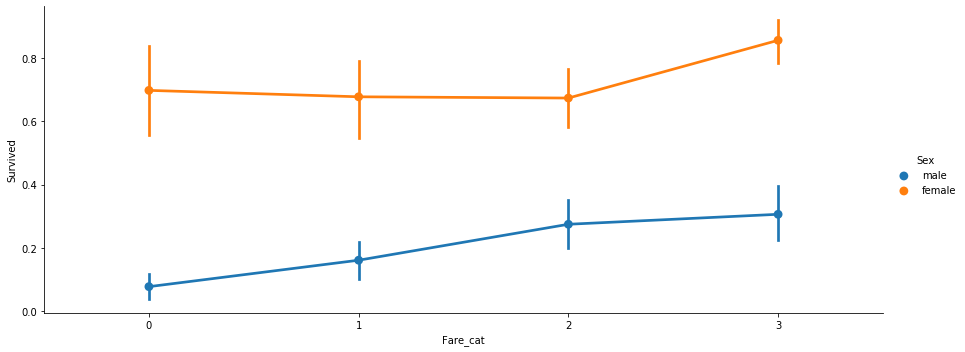

In [0]:
sns.factorplot('Fare_cat','Survived',data=titanic_train,hue='Sex',aspect=2.5)
#aspect-> signifies the width of the plot
plt.show()

- Clearly, as the Fare_cat increases, the survival chances increases

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 0.98, 'Survival by Gender , Age and Fare')

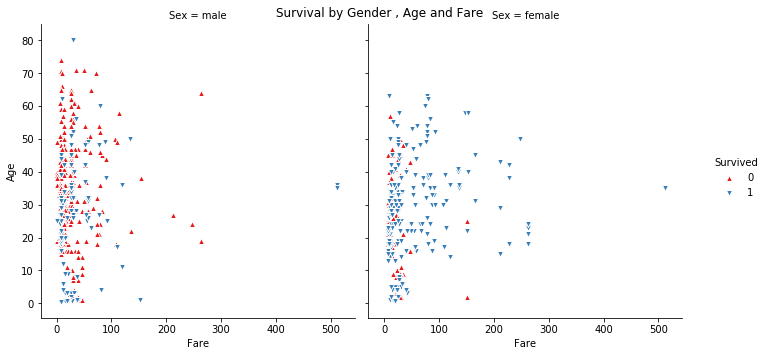

In [0]:
g = sns.FacetGrid(titanic_train, hue="Survived", col="Sex", margin_titles=True,
                palette="Set1",hue_kws=dict(marker=["^", "v"]),size=5)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
#plt.subplots_adjust(top=0.8)
g.fig.suptitle('Survival by Gender , Age and Fare')

- Females who have paid higher fare are mostly survived but it's not the same case with Males

## Survival Rates 

In [0]:
titanic_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [0]:
print("% of survivals in") 
print("Pclass=1 : ", titanic_train.Survived[titanic_train.Pclass == 1].sum()/titanic_train[titanic_train.Pclass == 1].Survived.count())
print("Pclass=2 : ", titanic_train.Survived[titanic_train.Pclass == 2].sum()/titanic_train[titanic_train.Pclass == 2].Survived.count())
print("Pclass=3 : ", titanic_train.Survived[titanic_train.Pclass == 3].sum()/titanic_train[titanic_train.Pclass == 3].Survived.count())

% of survivals in
Pclass=1 :  0.6296296296296297
Pclass=2 :  0.47282608695652173
Pclass=3 :  0.24236252545824846


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


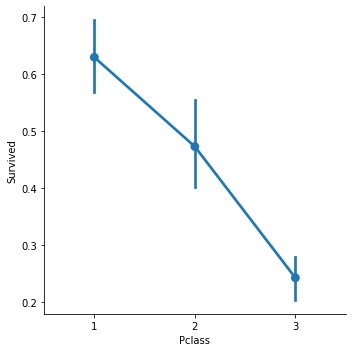

In [0]:
sns.factorplot(x='Pclass',y='Survived', data=titanic_train)
#By default factorplot shows point plot
#They are particularly good at showing interactions: 
#i.e.,how the relationship between levels of one categorical variable changes across levels of a second categorical variable
plt.show()

- Survival rate is more for class 1 passengers
- Survival rate decreases with Pclass

## Survival rate based on gender

In [0]:
titanic_train.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


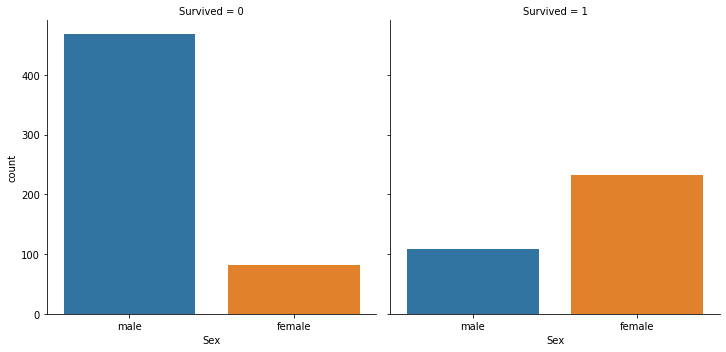

In [0]:
sns.factorplot(x='Sex', col='Survived', kind='count', data=titanic_train);

In [0]:
print("% of women survived: " , titanic_train[titanic_train.Sex == 'female'].Survived.sum()/titanic_train[titanic_train.Sex == 'female'].Survived.count())
print("% of men survived:   " , titanic_train[titanic_train.Sex == 'male'].Survived.sum()/titanic_train[titanic_train.Sex == 'male'].Survived.count())

% of women survived:  0.7420382165605095
% of men survived:    0.18890814558058924


 - females are most likely to survive than males
 - 74% of women survived while only 19% of men survived (233 out of 314 females survived while only 109 males out of 577 survived)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


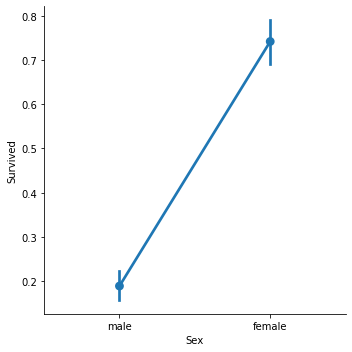

In [0]:
sns.factorplot(x='Sex',y='Survived',data=titanic_train)

- Most of the females survived (above 70%) & most of the males dies (below 20%)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


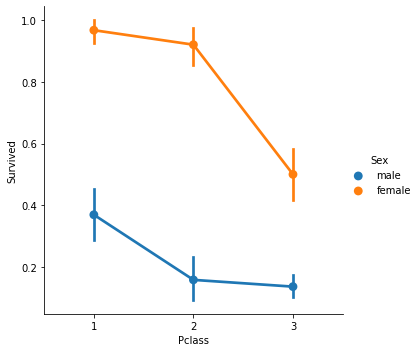

In [0]:
sns.factorplot(x='Pclass',y='Survived', hue='Sex',data=titanic_train)
#adding the parameter 'hue' helps in comparing the plots based on the value of hue, here we gave 'Sex' as a value in hue and hence we got plot to compare the survival rates for each gender
plt.show()

- Almost all women in Pclass 1 and 2 survived and nearly all men in Pclass 2 and 3 died

## Survival rate based on embarked(boarding) place

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


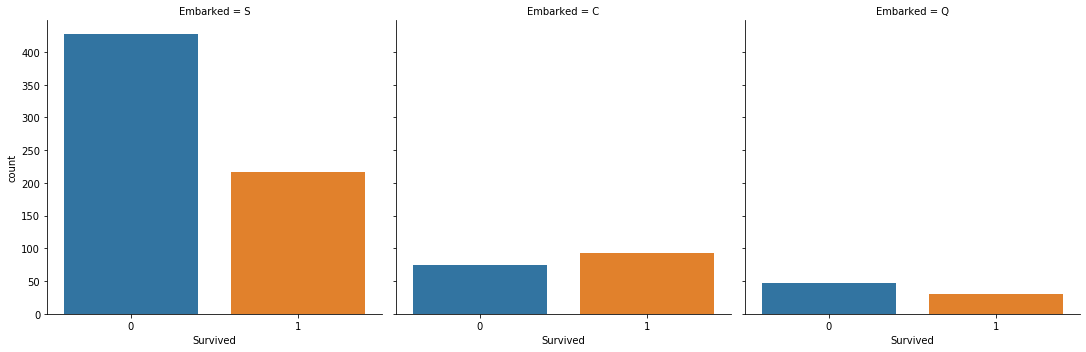

In [0]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=titanic_train)

- Most of the people died are Embarked on S

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


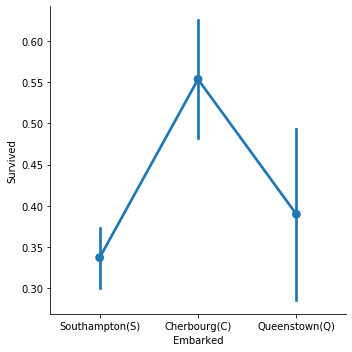

In [0]:
g=sns.factorplot('Embarked','Survived', data=titanic_train,size=5)
g.set_xticklabels(["Southampton(S)", "Cherbourg(C)", "Queenstown(Q)"])

- Most people embarked on C survived

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


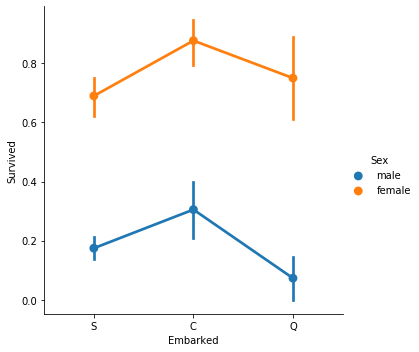

In [0]:
sns.factorplot('Embarked','Survived', hue= 'Sex', data=titanic_train)

- Approximately 85% women embarked at C survived.


## Embarked, Pclass and Sex vs Survival

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


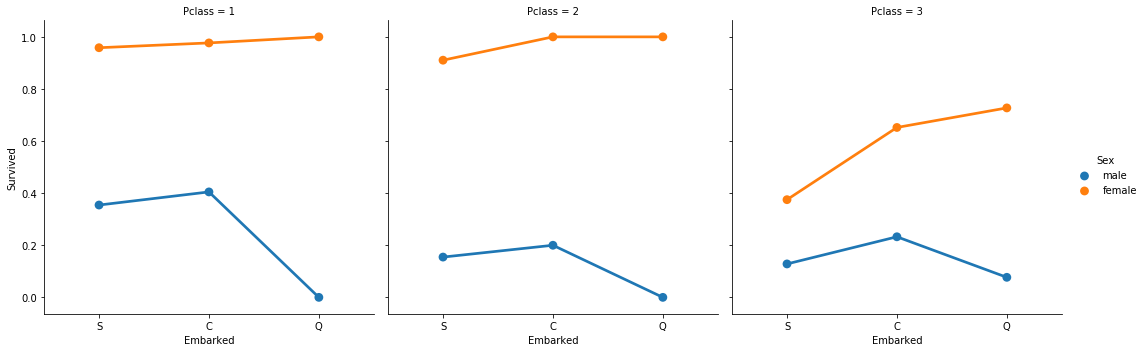

In [0]:
sns.factorplot('Embarked','Survived', col='Pclass', hue= 'Sex', data=titanic_train,ci=False)
#separate plots for embarked
plt.show()

- Practically all women of Pclass 2 that embarked in C and Q survived, also nearly all women of Pclass 1 survived.
- All men of Pclass 1 and 2 embarked at Q died, survival rate for men in Pclass 2 and 3 is always below 0.2
- For the remaining men in Pclass 1 that embarked at S and C, survival rate is approx. 0.4

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


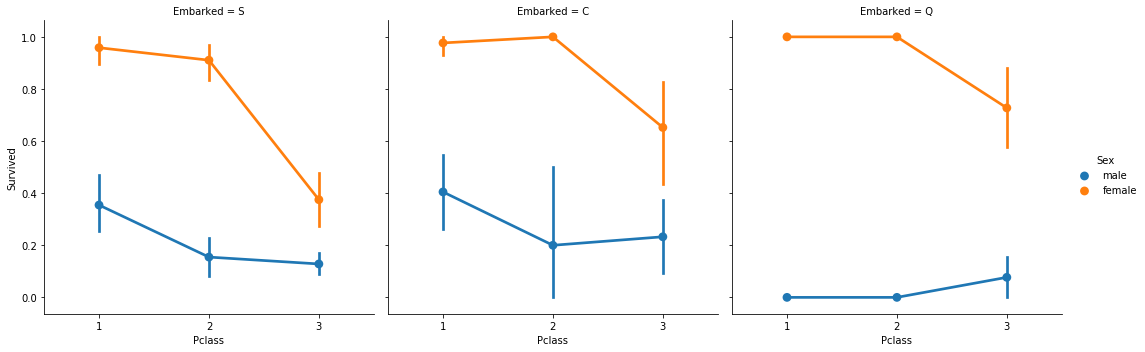

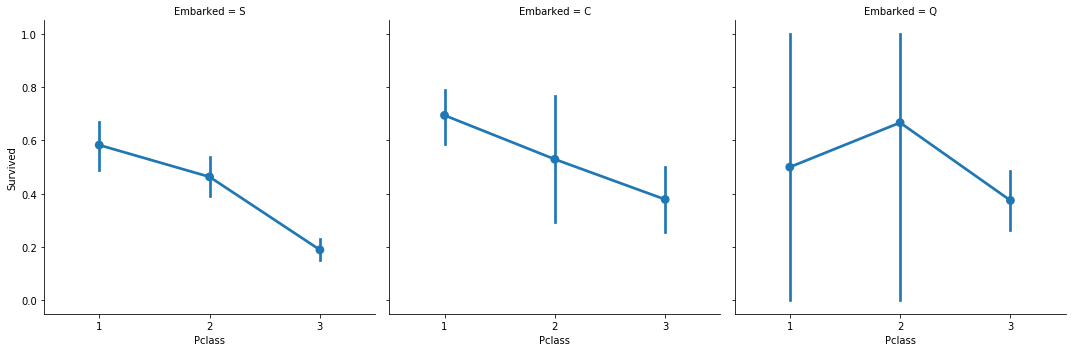

In [0]:
_ = sns.factorplot('Pclass', 'Survived', hue='Sex', col = 'Embarked', data=titanic_train)
#separate plots for Pclass
_ = sns.factorplot('Pclass', 'Survived', col = 'Embarked', data=titanic_train)

- As noticed already before, the class 1 passengers had a higher survival rate.
- Most of the women who died were from the 3rd class.
- Embarked at Q as a 3rd class gave you slighly better survival chances than embarked in S for the same class.

# Embarked vs Pclass (categorical vs categorical)

Pclass      1    2    3
Embarked               
C          85   17   66
Q           2    3   72
S         127  164  353


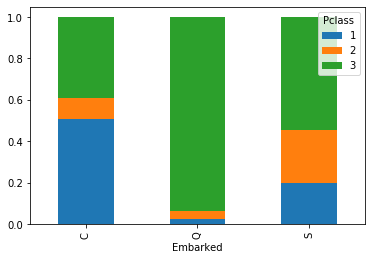

In [0]:
tab = pd.crosstab(titanic_train['Embarked'],titanic_train['Pclass'])
print(tab)
tab_prop = tab.div(tab.sum(1).astype(float), axis=0)
tab_prop.plot(kind="bar", stacked=True)

## Age Distribution

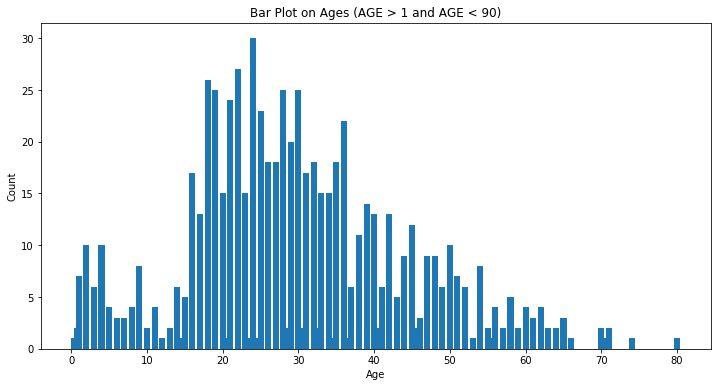

In [0]:
age_counts = titanic_train[['Age', 'PassengerId']].groupby('Age').count().reset_index()
age_counts.columns = ['AGE', 'FREQUENCY']
plt.figure(figsize=(12,6))
plt.bar(age_counts.AGE, age_counts.FREQUENCY)
plt.title('Bar Plot on Ages (AGE > 1 and AGE < 90)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- Most of the passengers are aged between 18 and 36

## Survival based on Age

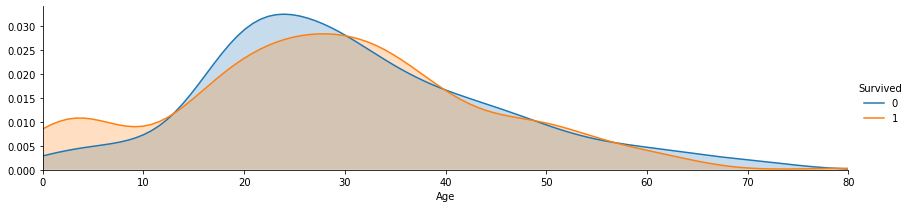

In [0]:
facet = sns.FacetGrid(titanic_train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_train['Age'].max()))
facet.add_legend()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


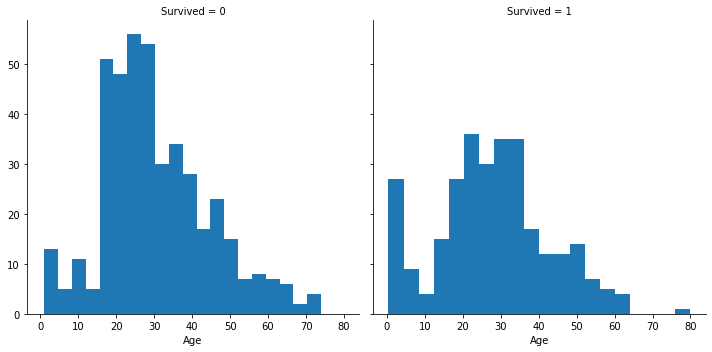

In [0]:
g = sns.FacetGrid(titanic_train, col='Survived',size=5)
g.map(plt.hist, 'Age', bins=20)

- Infants (Age <=4) had high survival rate
- Oldest passengers (Age = 80) survived
- Large number of 15-25 year olds did not survive
- Most passengers are in 15-35 age range

No handles with labels found to put in legend.
No handles with labels found to put in legend.


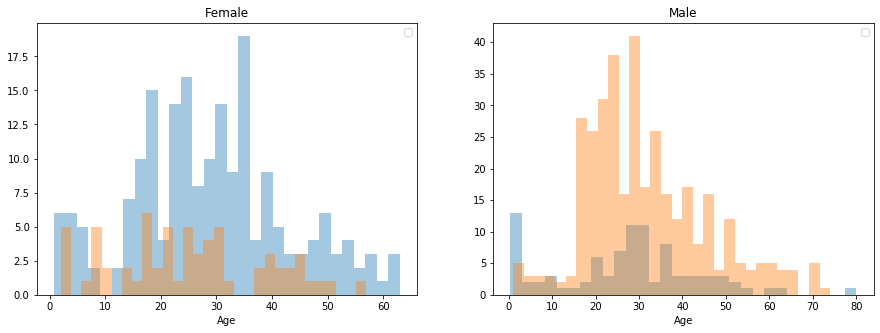

In [0]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(15,5))
#create 1 row and 2 columns (2 subplots)
females = titanic_train[titanic_train['Sex']=='female']
males = titanic_train[titanic_train['Sex']=='male']

ax = sns.distplot(females[females['Survived']==1].Age.dropna(), bins=30, ax = axes[0], kde =False)
ax = sns.distplot(females[females['Survived']==0].Age.dropna(), bins=30, ax = axes[0], kde =False)
#plot both on the same axes(axes[0])
ax.legend()
ax.set_title('Female')
ax = sns.distplot(males[males['Survived']==1].Age.dropna(), bins=30, ax = axes[1], kde = False)
ax = sns.distplot(males[males['Survived']==0].Age.dropna(), bins=30, ax = axes[1], kde = False)
#plot both on axes[1]
ax.legend()
_ = ax.set_title('Male')

- Most of the Females with age 18-38 survived.
- Most of the Males with age 18-35 died.

# Survival Rate vs Number of family members aboard

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


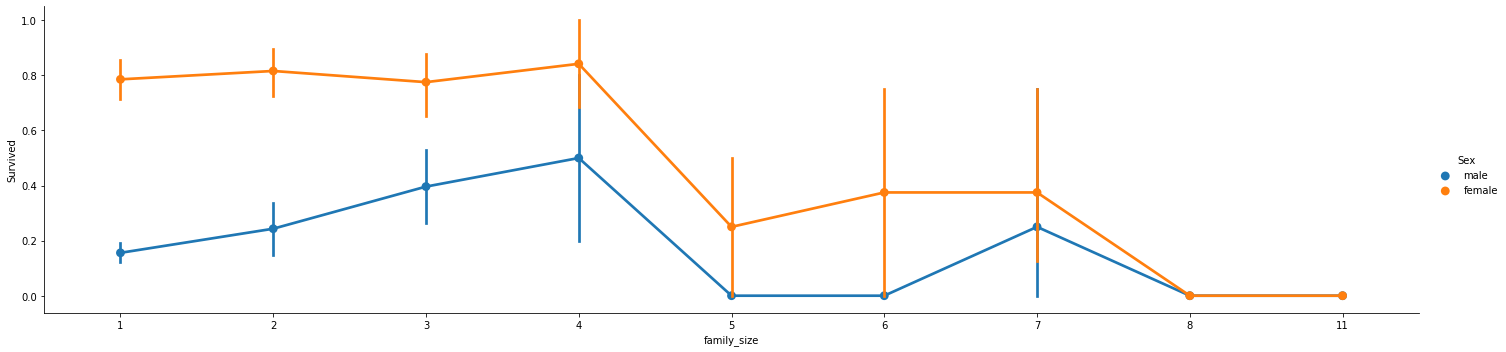

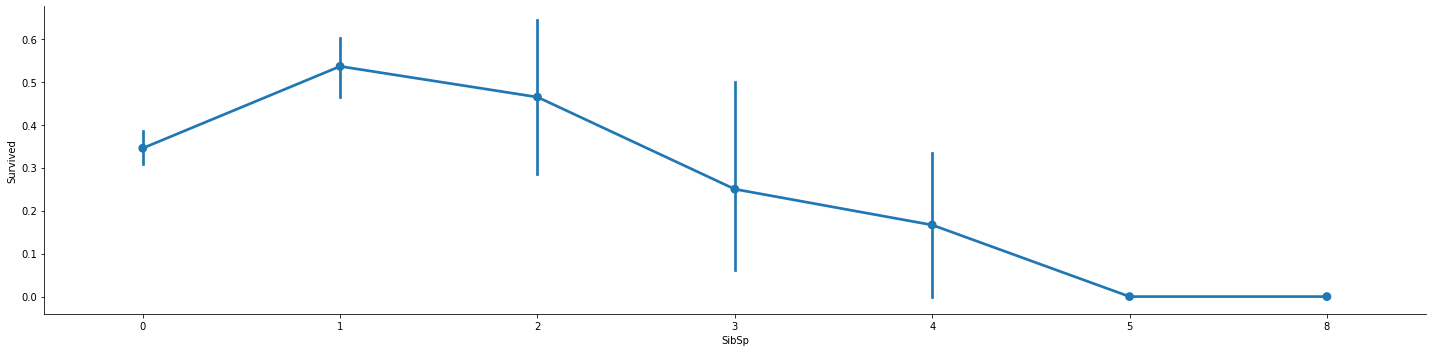

In [0]:
# To get the full family size of a person, added siblings and parch.
#fig, axes = plt.subplots(nrows=1, ncols=1,figsize=(15, 5))
titanic_train['family_size'] = titanic_train['SibSp'] + titanic_train['Parch'] + 1 
_ = sns.factorplot('family_size','Survived', hue = 'Sex', data=titanic_train, aspect = 4)
#separate for male and female
_ = sns.factorplot('SibSp','Survived',data=titanic_train,aspect=4)
#all passengers

- Assumption: the less people was in your family the faster you were to get to the boat. The more people they are the more managment is required. However, if you had no family members you might wanted to help others and therefore sacrifice
- The females traveling with up to 2 more family members had a higher chance to survive. However, a high variation of survival rate appears once family size exceeds 4 as mothers/daughters would search longer for the members and therefore the chanes for survival decrease
- Alone men might want to sacrifice and help other people to survive

# General overview of all variables vs survival

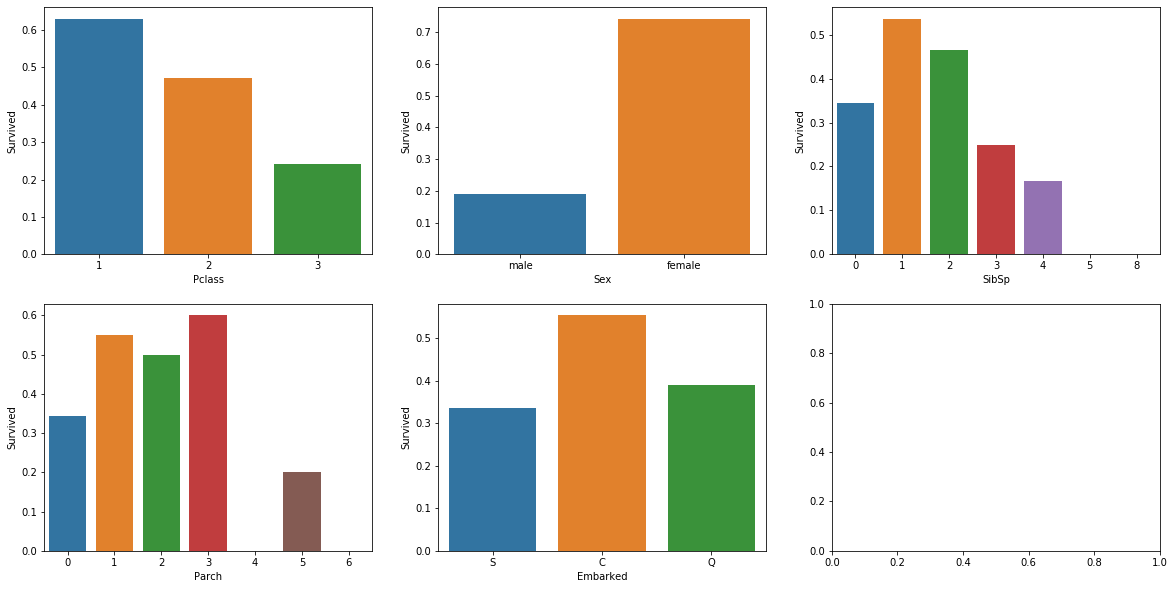

In [0]:
plain_features = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
fig, ax = plt.subplots(nrows = 2, ncols = 3 ,figsize=(20,10))
start = 0
for j in range(2):
    for i in range(3):
        if start == len(plain_features):
            break
        sns.barplot(x=plain_features[start], y='Survived', data=titanic_train, ax=ax[j,i], ci = False)
        start += 1

Observations in a Nutshell for all features:
- Sex: The chance of survival for women is high as compared to men.

- Pclass:There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass3 is very low. For women, the chance of survival from Pclass1 is almost 1 and is high too for those from Pclass2. Money Wins!!!.

- Age: Children less than 5-10 years do have a high chance of survival.Also all old passengers survived(>=80). Most of the passengers between age group 15 to 35 died.

- Embarked: This is a very interesting feature. The chances of survival at C looks even though the majority of Pclass1 passengers boarded at S. Passengers at Q were all from Pclass3.

- Parch+SibSp: Having 1-2 siblings,spouse on board or 1-3 count of parents/children shows a greater probablity of survival rather than being alone or having a large family travelling with you

# Missing Value Imputation

In [0]:
titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Fare_cat         0
family_size      0
dtype: int64

In [0]:
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare_cat,family_size
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,3,1
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,3,1


PassengerId 62 and 830 have missing embarked values

Both have Passenger class 1 and fare $80.

plot a graph to visualize and try to guess from where they embarked

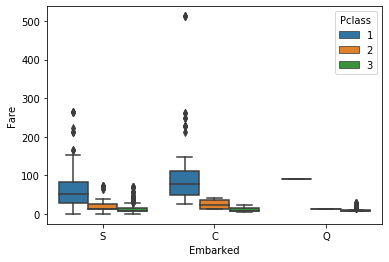

In [0]:
sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=titanic_train)

In [0]:
titanic_train["Embarked"] = titanic_train["Embarked"].fillna('C')

For 1st class median line is coming around fare $80 for embarked value 'C'. So we can replace NA values in Embarked column with 'C'

# Data Preprocessing

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import tree, model_selection
from sklearn.metrics import accuracy_score

In [0]:
# Preprocessing data
titanic_train1 = pd.get_dummies(titanic_train, columns = ['Embarked','Sex'])

In [0]:
titanic_train1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Fare_cat         int64
family_size      int64
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
Sex_female       uint8
Sex_male         uint8
dtype: object

In [0]:
X = titanic_train1.drop(['PassengerId','Survived', 'Cabin', 'Name', 'Age', 'Ticket', ], axis = 1)
y = titanic_train1['Survived']

In [0]:
X.head()

,Pclass,SibSp,Parch,Fare,Fare_cat,family_size,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,3,1,0,7.2500,0,2,0,0,1,0,1
1,1,1,0,71.2833,3,2,1,0,0,1,0
2,3,0,0,7.9250,1,1,0,0,1,1,0
3,1,1,0,53.1000,3,2,0,0,1,1,0
4,3,0,0,8.0500,1,1,0,0,1,0,1


In [0]:
 y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
# Dividing into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state = 10 )

In [0]:
#Baseline Model - As deduced from EDA, most passengers died. Make all passengers as died.
X_test['y_pred_bas'] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
accuracy_score(y_test, X_test.y_pred_bas)

0.6143497757847534

# Model Building

In [0]:
#Make Decision Tree Model
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [0]:
X_test.columns

Index(['Pclass', 'SibSp', 'Parch', 'Fare', 'Fare_cat', 'family_size',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male',
       'y_pred_bas'],
      dtype='object')

In [0]:
y_pred = dt.predict(X_test.drop('y_pred_bas', axis=1))

In [0]:
y_pred

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0])

In [0]:
accuracy_score(y_pred, y_test)

0.7982062780269058

In [0]:
#Before Actually applying to the test data, you need to check how your model is performing. So we keep some data for validation

In [0]:
cv_scores = model_selection.cross_val_score(dt, X_train, y_train, cv=10, verbose=1)
print ('Cross Validation Score : ',cv_scores.mean() )

Cross Validation Score :  0.7741067390321122


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [0]:
print('Training Accuracy : ',dt.score(X_train,y_train))

Training Accuracy :  0.9281437125748503


In [0]:
confusion_matrix(y_pred, y_test)

array([[109,  17],
       [ 28,  69]])

In [0]:
#X_test['y_pred_f'] = X_test.Sex.apply(lambda x : 1 if x == 'female' else 0)